In [1]:
import gizmo_analysis as gizmo
import utilities as ut
import numpy as np
import matplotlib.pyplot as plt
import importlib
from matplotlib import colors
import ob
from astropy.table import Table, Column
from astropy.io import ascii
import pandas as pd

In [2]:
sim_dir = "../data/latte_metaldiff/"
sims_name = "m12m_res7100"
part = gizmo.io.Read.read_snapshots(
    ["dark", "star"], "redshift", 0, sim_dir + sims_name, assign_hosts_rotation=True
)


# in utilities.simulation.Snapshot():
* reading:  data/latte_metaldiff/m12m_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  data/latte_metaldiff/m12m_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116752958 particles
    star      (id = 4): 25344979 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5
    snapshot_600.4.hdf5
    snapshot_600.5.hdf5
    snapshot_600.6.hdf5
    snapshot_600.7.hdf5

* reading cosmological parameters from:  data/latte_metaldiff/m12m_res7100/initial_condition/ic_agora_m12m.conf

* checking sanity of particle properties
! warning: star 

In [3]:
pos_dark = part["dark"].prop("host.distance")
pos_star = part["star"].prop("host.distance")
vel_dark = part["dark"].prop("host.velocity")
vel_star = part["star"].prop("host.velocity")

In [4]:
def angular_momentum(distance_max=10):
    mask = (pos_star[:, 0] ** 2 + pos_star[:, 1] ** 2 + pos_star[:, 2] ** 2) ** (
        1 / 2
    ) < distance_max
    cprod = np.cross(pos_star[mask], vel_star[mask])
    return np.median(cprod, axis=0) / np.linalg.norm(np.median(cprod, axis=0))


disk_momentum = angular_momentum()

print(disk_momentum)

[-0.82590212 -0.42550501 -0.36990698]


In [5]:
r = np.arange(10, 410, 10)

In [6]:
# %%time
# tensors = []
# ratios = []
# lengths = []
# for r_i in r:
#     print(r_i)
#     tensor, ratio, l = obliquity.inertia_tensor(pos_dark, vel_dark, baseline_momentum=disk_momentum, r_max=r_i, correct=True)
#     tensors.append(tensor)
#     ratios.append(ratio)
#     lengths.append(l)
# tensors = np.array(tensors)
# ratios = np.array(ratios)
# lengths = np.array(lengths)

In [7]:
df = pd.read_hdf(f"_data_obliquityAngles_z0_{sims_name[:4]}.h5")
tensors_wtf = df["tensors"].to_numpy()

In [8]:
tensors = np.array([df["tensors"][i] for i in np.arange(len(tensors_wtf))])

In [9]:
host_axes = part.host["rotation"][0]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


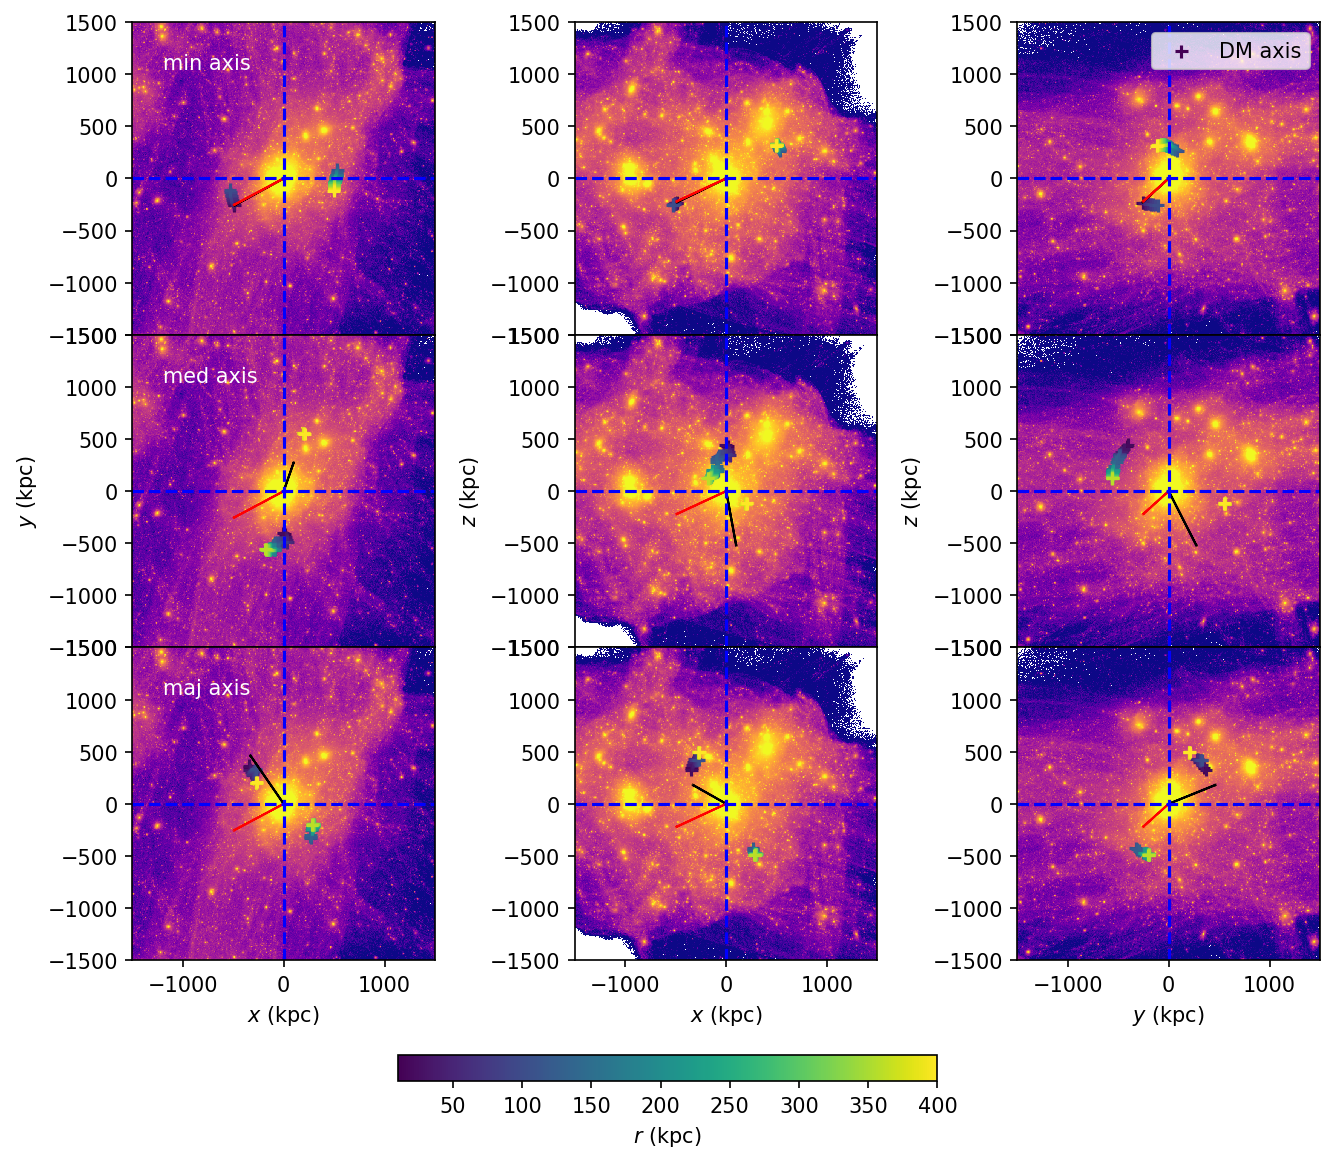

CPU times: user 8min 44s, sys: 1min 12s, total: 9min 56s
Wall time: 9min 55s


In [10]:
%%time

fig = plt.figure(dpi=150, figsize=(9, 7))

min_ax_xy = fig.add_subplot(331)
min_ax_xz = fig.add_subplot(332)
min_ax_yz = fig.add_subplot(333)
med_ax_xy = fig.add_subplot(334)
med_ax_xz = fig.add_subplot(335)
med_ax_yz = fig.add_subplot(336)
maj_ax_xy = fig.add_subplot(337)
maj_ax_xz = fig.add_subplot(338)
maj_ax_yz = fig.add_subplot(339)

scale = 1500
exag = 600

# mask = np.sqrt(pos_dark[:,0]**2 + pos_dark[:,1]**2 + pos_dark[:,2]**2) < 100
mask_xy = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 1]) < scale)
mask_xz = (abs(pos_dark[:, 0]) < scale) & (abs(pos_dark[:, 2]) < scale)
mask_yz = (abs(pos_dark[:, 1]) < scale) & (abs(pos_dark[:, 2]) < scale)

b = 500
vmax = 5000
vmin = 10

min_ax_xy.hist2d(
    pos_dark[:, 0][mask_xy],
    pos_dark[:, 1][mask_xy],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
min_ax_xz.hist2d(
    pos_dark[:, 0][mask_xz],
    pos_dark[:, 2][mask_xz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
min_ax_yz.hist2d(
    pos_dark[:, 1][mask_yz],
    pos_dark[:, 2][mask_yz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
med_ax_xy.hist2d(
    pos_dark[:, 0][mask_xy],
    pos_dark[:, 1][mask_xy],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
med_ax_xz.hist2d(
    pos_dark[:, 0][mask_xz],
    pos_dark[:, 2][mask_xz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
med_ax_yz.hist2d(
    pos_dark[:, 1][mask_yz],
    pos_dark[:, 2][mask_yz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
maj_ax_xy.hist2d(
    pos_dark[:, 0][mask_xy],
    pos_dark[:, 1][mask_xy],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
maj_ax_xz.hist2d(
    pos_dark[:, 0][mask_xz],
    pos_dark[:, 2][mask_xz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)
maj_ax_yz.hist2d(
    pos_dark[:, 1][mask_yz],
    pos_dark[:, 2][mask_yz],
    bins=b,
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
    cmap="plasma",
)


min_ax_xy.arrow(0, 0, exag * host_axes[2, 0], exag * host_axes[2, 1])
min_ax_xz.arrow(0, 0, exag * host_axes[2, 0], exag * host_axes[2, 2])
min_ax_yz.arrow(0, 0, exag * host_axes[2, 1], exag * host_axes[2, 2])
med_ax_xy.arrow(0, 0, exag * host_axes[1, 0], exag * host_axes[1, 1])
med_ax_xz.arrow(0, 0, exag * host_axes[1, 0], exag * host_axes[1, 2])
med_ax_yz.arrow(0, 0, exag * host_axes[1, 1], exag * host_axes[1, 2])
maj_ax_xy.arrow(0, 0, exag * host_axes[0, 0], exag * host_axes[0, 1])
maj_ax_xz.arrow(0, 0, exag * host_axes[0, 0], exag * host_axes[0, 2])
maj_ax_yz.arrow(0, 0, exag * host_axes[0, 1], exag * host_axes[0, 2])

min_ax_xy.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[1], color="red")
min_ax_xz.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[2], color="red")
min_ax_yz.arrow(0, 0, exag * disk_momentum[1], exag * disk_momentum[2], color="red")
med_ax_xy.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[1], color="red")
med_ax_xz.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[2], color="red")
med_ax_yz.arrow(0, 0, exag * disk_momentum[1], exag * disk_momentum[2], color="red")
maj_ax_xy.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[1], color="red")
maj_ax_xz.arrow(0, 0, exag * disk_momentum[0], exag * disk_momentum[2], color="red")
maj_ax_yz.arrow(0, 0, exag * disk_momentum[1], exag * disk_momentum[2], color="red")

min_ax_xy.axhline(0, c="b", ls="--")
min_ax_xz.axhline(0, c="b", ls="--")
min_ax_yz.axhline(0, c="b", ls="--")
med_ax_xy.axhline(0, c="b", ls="--")
med_ax_xz.axhline(0, c="b", ls="--")
med_ax_yz.axhline(0, c="b", ls="--")
maj_ax_xy.axhline(0, c="b", ls="--")
maj_ax_xz.axhline(0, c="b", ls="--")
maj_ax_yz.axhline(0, c="b", ls="--")

min_ax_xy.axvline(0, c="b", ls="--")
min_ax_xz.axvline(0, c="b", ls="--")
min_ax_yz.axvline(0, c="b", ls="--")
med_ax_xy.axvline(0, c="b", ls="--")
med_ax_xz.axvline(0, c="b", ls="--")
med_ax_yz.axvline(0, c="b", ls="--")
maj_ax_xy.axvline(0, c="b", ls="--")
maj_ax_xz.axvline(0, c="b", ls="--")
maj_ax_yz.axvline(0, c="b", ls="--")

min_ax_xy.set_xlim(-scale, scale)
min_ax_xz.set_xlim(-scale, scale)
min_ax_yz.set_xlim(-scale, scale)
med_ax_xy.set_xlim(-scale, scale)
med_ax_xz.set_xlim(-scale, scale)
med_ax_yz.set_xlim(-scale, scale)
maj_ax_xy.set_xlim(-scale, scale)
maj_ax_xz.set_xlim(-scale, scale)
maj_ax_yz.set_xlim(-scale, scale)

min_ax_xy.set_ylim(-scale, scale)
min_ax_xz.set_ylim(-scale, scale)
min_ax_yz.set_ylim(-scale, scale)
med_ax_xy.set_ylim(-scale, scale)
med_ax_xz.set_ylim(-scale, scale)
med_ax_yz.set_ylim(-scale, scale)
maj_ax_xy.set_ylim(-scale, scale)
maj_ax_xz.set_ylim(-scale, scale)
maj_ax_yz.set_ylim(-scale, scale)

# min_ax_xy.set_xlabel('$x$ (kpc)')
# min_ax_xz.set_xlabel('$x$ (kpc)')
# min_ax_yz.set_xlabel('$y$ (kpc)')
# med_ax_xy.set_xlabel('$x$ (kpc)')
# med_ax_xz.set_xlabel('$x$ (kpc)')
# med_ax_yz.set_xlabel('$y$ (kpc)')
maj_ax_xy.set_xlabel("$x$ (kpc)")
maj_ax_xz.set_xlabel("$x$ (kpc)")
maj_ax_yz.set_xlabel("$y$ (kpc)")

# min_ax_xy.set_ylabel('$y$ (kpc)')
# min_ax_xz.set_ylabel('$z$ (kpc)')
# min_ax_yz.set_ylabel('$z$ (kpc)')
med_ax_xy.set_ylabel("$y$ (kpc)")
med_ax_xz.set_ylabel("$z$ (kpc)")
med_ax_yz.set_ylabel("$z$ (kpc)")
# maj_ax_xy.set_ylabel('$y$ (kpc)')
# maj_ax_xz.set_ylabel('$z$ (kpc)')
# maj_ax_yz.set_ylabel('$z$ (kpc)')

min_ax_xy.sharex(maj_ax_xy)
med_ax_xy.sharex(maj_ax_xy)

min_ax_xz.sharex(maj_ax_xz)
med_ax_xz.sharex(maj_ax_xz)

focus = min_ax_xy.scatter(
    exag * tensors[:, 2, 0], exag * tensors[:, 2, 1], c=r, marker="+"
)
min_ax_xz.scatter(exag * tensors[:, 2, 0], exag * tensors[:, 2, 2], c=r, marker="+")
min_ax_yz.scatter(
    exag * tensors[:, 2, 1], exag * tensors[:, 2, 2], c=r, marker="+", label="DM axis"
)
med_ax_xy.scatter(exag * tensors[:, 1, 0], exag * tensors[:, 1, 1], c=r, marker="+")
med_ax_xz.scatter(exag * tensors[:, 1, 0], exag * tensors[:, 1, 2], c=r, marker="+")
med_ax_yz.scatter(exag * tensors[:, 1, 1], exag * tensors[:, 1, 2], c=r, marker="+")
maj_ax_xy.scatter(exag * tensors[:, 0, 0], exag * tensors[:, 0, 1], c=r, marker="+")
maj_ax_xz.scatter(exag * tensors[:, 0, 0], exag * tensors[:, 0, 2], c=r, marker="+")
maj_ax_yz.scatter(exag * tensors[:, 0, 1], exag * tensors[:, 0, 2], c=r, marker="+")

min_ax_xy.text(
    0.1, 0.85, "min axis", fontsize="medium", c="white", transform=min_ax_xy.transAxes
)
med_ax_xy.text(
    0.1, 0.85, "med axis", fontsize="medium", c="white", transform=med_ax_xy.transAxes
)
maj_ax_xy.text(
    0.1, 0.85, "maj axis", fontsize="medium", c="white", transform=maj_ax_xy.transAxes
)

min_ax_xy.plot(0, ls="-", c="black", label="Host axis")

min_ax_yz.legend(loc="upper right")

# fig.suptitle('{}'.format(sims_name))

cax = fig.add_axes([0.5 - (0.4 / 2), -0.03, 0.4, 0.025])
fig.colorbar(focus, cax=cax, orientation="horizontal", label="$r$ (kpc)")

fig.tight_layout()
plt.subplots_adjust(hspace=0.0)

plt.setp(min_ax_xy.get_xticklabels(), visible=False)
plt.setp(med_ax_xy.get_xticklabels(), visible=False)

plt.setp(min_ax_xz.get_xticklabels(), visible=False)
plt.setp(med_ax_xz.get_xticklabels(), visible=False)
plt.setp(min_ax_yz.get_xticklabels(), visible=False)
plt.setp(med_ax_yz.get_xticklabels(), visible=False)


plt.savefig("{}_all_axes.pdf".format(sims_name), bbox_inches="tight")

plt.show()